In [ ]:
from google.colab import drive

drive.mount('/content/drive')

## **1. Clone YOLOv10 source code**

In [ ]:
!git clone https://github.com/THU-MIG/yolov10.git

fatal: destination path 'yolov10' already exists and is not an empty directory.


## **2. Install required packages**


In [1]:
%cd /content/drive/MyDrive/IMAGE PROJECT-WORKING SAFETY MONITORING USING YOLOV10(HIGH-LEVEL OBJECT DETECTION)/yolov10
!pip install -q -r requirements.txt
!pip install -e .

/content/drive/MyDrive/Working Safety Monitoring Using Yolov10/yolov10
Obtaining file:///content/drive/MyDrive/Working%20Safety%20Monitoring%20Using%20Yolov10/yolov10
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for ultralytics (pyproject.toml) ... done
  Created wheel for ultralytics: filename=ultralytics-8.1.34-0.editable-py3-none-any.whl size=20580 sha256=ec8eb67b08a5504a2310b1e3e9c0a24e42289d6b206e309a80128ddc7230619d
  Stored in directory: /tmp/pip-ephem-wheel-cache-qei6fwkl/wheels/19/d9/b0/39d86b679ab071508cc3aff77138618cf32c168bba40d49c02
Successfully built ultralytics
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.1.34
    Uninstalling ultralytics-8.1.34:
      Successfully uninstalled ultralytics-8.1.34


## **3. Download pre-trained weight**

In [ ]:
##!wget https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10n.pt

## **4. Create YOLO model**

In [9]:
from ultralytics import YOLOv10
MODEL_PATH = 'yolov10n.pt'
model = YOLOv10(MODEL_PATH)

In [10]:
model.info()

YOLOv10n summary: 385 layers, 2775520 parameters, 2775504 gradients


(385, 2775520, 2775504, 0.0)

## **5. Download and Unzip dataset**

In [5]:
# https://drive.google.com/file/d/1twdtZEfcw4ghSZIiPDypJurZnNXzMO7R/view?usp=sharing
!gdown '1twdtZEfcw4ghSZIiPDypJurZnNXzMO7R'
!mkdir safety_helmet_dataset
!unzip -q '/content/drive/MyDrive/IMAGE PROJECT-WORKING SAFETY MONITORING USING YOLOV10(HIGH-LEVEL OBJECT DETECTION)/yolov10/Safety_Helmet_Dataset.zip' -d '/content/drive/MyDrive/IMAGE PROJECT-WORKING SAFETY MONITORING USING YOLOV10(HIGH-LEVEL OBJECT DETECTION)/safety_helmet_dataset'

Downloading...
From (original): https://drive.google.com/uc?id=1twdtZEfcw4ghSZIiPDypJurZnNXzMO7R
From (redirected): https://drive.google.com/uc?id=1twdtZEfcw4ghSZIiPDypJurZnNXzMO7R&confirm=t&uuid=1cfe3808-c9ef-46a9-8882-380111571da9
To: /content/drive/MyDrive/Working Safety Monitoring Using Yolov10/yolov10/Safety_Helmet_Dataset.zip
100% 33.7M/33.7M [00:00<00:00, 172MB/s]


## **6. Training**

In [11]:
YAML_PATH = '/content/drive/MyDrive/IMAGE PROJECT-WORKING SAFETY MONITORING USING YOLOV10(HIGH-LEVEL OBJECT DETECTION)/safety_helmet_dataset/data.yaml'
EPOCHS = 30
IMG_SIZE = 640
BATCH_SIZE = 64

model.train(data = YAML_PATH, epochs = EPOCHS, batch = BATCH_SIZE, imgsz = IMG_SIZE)

New https://pypi.org/project/ultralytics/8.2.48 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov10n.pt, data=/content/drive/MyDrive/Working Safety Monitoring Using Yolov10/safety_helmet_dataset/data.yaml, epochs=30, time=None, patience=100, batch=64, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, ag

100%|██████████| 755k/755k [00:00<00:00, 100MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1      9856  ultralytics.nn.modules.block.SCDown          [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1     36096  ultralytics

train: Scanning /content/drive/MyDrive/Working Safety Monitoring Using Yolov10/safety_helmet_dataset/train/labels.cache... 761 images, 0 backgrounds, 0 corrupt: 100%|██████████| 761/761 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/Working Safety Monitoring Using Yolov10/safety_helmet_dataset/valid/labels.cache... 218 images, 0 backgrounds, 0 corrupt: 100%|██████████| 218/218 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 95 weight(decay=0.0), 108 weight(decay=0.0005), 107 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       1/30      11.8G      1.698      3.339      1.709       1.53      5.181      1.551        237        640: 100%|██████████| 12/12 [03:08<00:00, 15.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.84s/it]

                   all        218        586    0.00961       0.57      0.148     0.0738



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       2/30      11.9G      1.582      2.299      1.551      1.389      4.299      1.416        261        640: 100%|██████████| 12/12 [00:16<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.06s/it]

                   all        218        586    0.00954      0.578      0.121     0.0619



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       3/30      11.9G      1.578      1.706      1.521      1.337       3.83      1.372        265        640: 100%|██████████| 12/12 [00:16<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.90s/it]


                   all        218        586    0.00639      0.697      0.181     0.0922

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       4/30      11.9G      1.536      1.583      1.496       1.37      3.579      1.377        254        640: 100%|██████████| 12/12 [00:15<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.84s/it]


                   all        218        586     0.0107      0.677      0.165     0.0792

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       5/30      11.9G      1.582        1.6      1.515      1.451      3.376      1.414        261        640: 100%|██████████| 12/12 [00:16<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.89s/it]


                   all        218        586      0.459      0.428      0.211     0.0995

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       6/30      11.8G      1.565      1.538      1.486      1.483      3.169       1.42        232        640: 100%|██████████| 12/12 [00:15<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.32s/it]


                   all        218        586      0.805      0.117      0.227     0.0987

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       7/30      11.9G      1.615      1.525      1.508      1.537       2.86      1.433        278        640: 100%|██████████| 12/12 [00:14<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.88s/it]


                   all        218        586       0.86      0.102      0.281      0.124

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       8/30      11.8G      1.585      1.512      1.479      1.562      2.666      1.414        262        640: 100%|██████████| 12/12 [00:13<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.01s/it]


                   all        218        586       0.72     0.0948      0.178     0.0537

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       9/30      11.8G      1.613      1.489      1.529      1.577      2.469      1.462        251        640: 100%|██████████| 12/12 [00:14<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.72s/it]

                   all        218        586       0.63      0.235      0.235     0.0736



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      10/30      11.9G      1.595       1.44      1.493      1.572      2.312      1.439        228        640: 100%|██████████| 12/12 [00:14<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.54s/it]


                   all        218        586      0.613      0.134      0.115     0.0417

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      11/30      11.9G      1.594      1.406      1.517      1.569      2.122      1.444        277        640: 100%|██████████| 12/12 [00:16<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.78s/it]

                   all        218        586      0.571      0.198      0.176     0.0672



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      12/30      11.8G      1.552      1.341      1.472      1.554      1.938       1.41        262        640: 100%|██████████| 12/12 [00:16<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.96s/it]

                   all        218        586      0.671      0.342      0.335      0.135



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      13/30      11.7G       1.52      1.294      1.468      1.527      1.837      1.416        275        640: 100%|██████████| 12/12 [00:16<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.87s/it]

                   all        218        586      0.509      0.455      0.452      0.191



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      14/30      11.9G      1.544      1.278      1.474      1.552      1.729      1.423        258        640: 100%|██████████| 12/12 [00:15<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.86s/it]

                   all        218        586      0.696      0.422      0.456      0.198



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      15/30      11.7G      1.499      1.215      1.457       1.52       1.66      1.412        233        640: 100%|██████████| 12/12 [00:14<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.28s/it]


                   all        218        586       0.73      0.391      0.423      0.182

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      16/30      11.9G      1.486      1.174      1.431      1.507      1.581      1.378        299        640: 100%|██████████| 12/12 [00:13<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.44s/it]


                   all        218        586      0.529      0.583      0.533      0.245

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      17/30      11.9G       1.47      1.137      1.442      1.488      1.497      1.405        263        640: 100%|██████████| 12/12 [00:13<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.82s/it]


                   all        218        586      0.636      0.639      0.648      0.278

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      18/30      11.8G       1.47      1.102      1.412      1.478      1.449      1.372        234        640: 100%|██████████| 12/12 [00:13<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.16s/it]

                   all        218        586      0.597      0.634       0.67      0.313



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      19/30      11.8G       1.45      1.092      1.398      1.464      1.413      1.361        270        640: 100%|██████████| 12/12 [00:14<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.62s/it]

                   all        218        586      0.625      0.647      0.665      0.328



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      20/30      11.9G      1.452      1.086      1.409       1.48      1.364      1.382        298        640: 100%|██████████| 12/12 [00:15<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.18s/it]

                   all        218        586      0.724       0.65      0.729      0.349


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      21/30      11.7G      1.448      1.011      1.439      1.485      1.266      1.424        175        640: 100%|██████████| 12/12 [00:23<00:00,  1.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.21s/it]


                   all        218        586      0.756      0.604      0.714       0.33

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      22/30      11.8G      1.387     0.8864      1.403      1.416      1.129      1.377        160        640: 100%|██████████| 12/12 [00:12<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.65s/it]


                   all        218        586      0.794      0.591      0.702      0.339

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      23/30      11.8G      1.382     0.8733      1.405      1.419      1.078      1.376        159        640: 100%|██████████| 12/12 [00:11<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.78s/it]


                   all        218        586      0.742      0.666       0.73      0.379

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      24/30      11.8G      1.348     0.8321      1.392      1.395      1.034      1.378        144        640: 100%|██████████| 12/12 [00:11<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.74s/it]


                   all        218        586      0.702      0.727      0.754      0.395

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      25/30      11.8G      1.326     0.7916      1.355      1.379     0.9442       1.34        162        640: 100%|██████████| 12/12 [00:12<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.58s/it]


                   all        218        586      0.645      0.784      0.746      0.386

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      26/30      11.7G      1.304     0.7759      1.338      1.339     0.9064      1.317        147        640: 100%|██████████| 12/12 [00:11<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.08s/it]


                   all        218        586      0.687        0.7      0.729      0.372

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      27/30      11.8G      1.264     0.7392      1.327      1.302     0.8889      1.316        141        640: 100%|██████████| 12/12 [00:11<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.85s/it]


                   all        218        586      0.712      0.754      0.775      0.406

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      28/30      11.8G      1.241     0.7241      1.302      1.286     0.8417      1.287        149        640: 100%|██████████| 12/12 [00:12<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.83s/it]

                   all        218        586      0.793       0.68      0.786      0.406



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      29/30      11.8G      1.237     0.7337      1.302      1.278     0.8532      1.283        149        640: 100%|██████████| 12/12 [00:12<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.19s/it]


                   all        218        586      0.824      0.749      0.815      0.412

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      30/30      11.8G      1.196     0.6877      1.279      1.244     0.7925      1.265        155        640: 100%|██████████| 12/12 [00:12<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.00s/it]


                   all        218        586      0.811       0.74      0.823      0.435

30 epochs completed in 0.250 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.8MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.8MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10n summary (fused): 285 layers, 2695586 parameters, 0 gradients


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.96s/it]


                   all        218        586      0.811      0.741      0.823      0.435
                  head        218         27      0.797      0.584      0.698       0.35
                helmet        218        285      0.857      0.822      0.921      0.469
                person        218        274      0.778      0.818      0.851      0.485
Speed: 0.2ms preprocess, 5.2ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ac435065ba0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

## **7. Evaluate model**

In [12]:
TRAINED_MODEL_PATH = '/content/drive/MyDrive/IMAGE PROJECT-WORKING SAFETY MONITORING USING YOLOV10(HIGH-LEVEL OBJECT DETECTION)/yolov10/runs/detect/train/weights/best.pt'

model.val(data=YAML_PATH, imgsz=IMG_SIZE, split='test')


Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10n summary (fused): 285 layers, 2695586 parameters, 0 gradients


val: Scanning /content/drive/MyDrive/Working Safety Monitoring Using Yolov10/safety_helmet_dataset/test/labels.cache... 109 images, 0 backgrounds, 0 corrupt: 100%|██████████| 109/109 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:08<00:00,  4.40s/it]


                   all        109        320      0.724      0.773      0.825      0.435
                  head        109         16      0.693      0.625      0.769      0.361
                helmet        109        162       0.77      0.926       0.93      0.473
                person        109        142      0.709      0.768      0.776      0.471
Speed: 0.3ms preprocess, 6.4ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ac434f76830>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

## **8. Run prediction with an image**


image 1/1 /content/drive/MyDrive/Working Safety Monitoring Using Yolov10/safety_helmet_dataset/test/images/person-117-_jpg.rf.60b60862c383d678e939b5f1b02201af.jpg: 640x640 3 helmets, 4 persons, 34.3ms
Speed: 3.8ms preprocess, 34.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


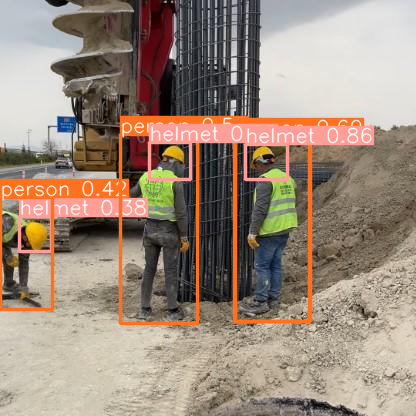

In [16]:
from google.colab.patches import cv2_imshow
TRAINED_MODEL_PATH = '/content/drive/MyDrive/IMAGE PROJECT-WORKING SAFETY MONITORING USING YOLOV10(HIGH-LEVEL OBJECT DETECTION)/yolov10/runs/detect/train/weights/best.pt'
model = YOLOv10(TRAINED_MODEL_PATH)
IMG_PATH = '/content/drive/MyDrive/IMAGE PROJECT-WORKING SAFETY MONITORING USING YOLOV10(HIGH-LEVEL OBJECT DETECTION)/safety_helmet_dataset/test/images/person-117-_jpg.rf.60b60862c383d678e939b5f1b02201af.jpg'
CONF_THERESHOLD = 0.3
IOU_THERESHOLD = 0.3
results = model.predict(source = IMG_PATH, imgsz = IMG_SIZE, conf=CONF_THERESHOLD, iou=IOU_THERESHOLD)
annotated_img = results[0].plot()
cv2_imshow(annotated_img)